In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pyscipopt import Model
from pyscipopt import quicksum

np.random.seed(0)

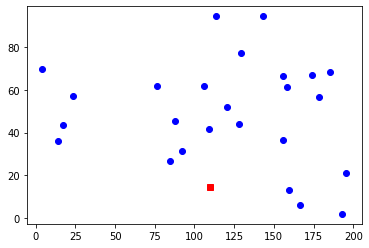

In [2]:
n = 25  # number of clients
xc = np.random.rand(n+1)*200
yc = np.random.rand(n+1)*100

plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')
plt.show()

In [3]:
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}

# Miller–Tucker–Zemlin formulation
# https://en.wikipedia.org/wiki/Travelling_salesman_problem

model = Model("CVRP")
x = {}
for index, (i,j) in enumerate(A):
    x[i,j] = model.addVar(vtype="B", name="x_"+str(index))
u = {}
for i in N:
    u[i] = model.addVar(vtype="I", name="u_"+str(i))
for i in V:
    model.addCons(quicksum(x[i,j] for j in V if j != i) == 1)
    model.addCons(quicksum(x[j,i] for j in V if j != i) == 1)
for i in N:
    model.addCons(u[i] >= 1)
    model.addCons(u[i] <= n)
for i in N:
    for j in N:
        if i!=j:
            model.addCons(u[i] - u[j] + (n+1) * x[i,j] <= n)

# Set objective function
model.setObjective(quicksum(c[i,j]*x[i,j] for i, j in A), "minimize")

# Set a time limit
model.setParam('limits/time', 60)

In [4]:
model.optimize()

Optimal value: 621.452556596569


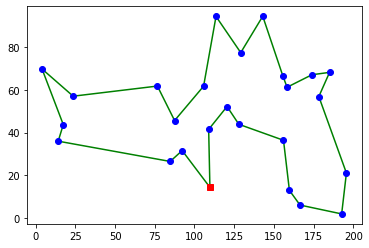

In [5]:
print("Optimal value:", model.getObjVal())
for i,j in A:
    if model.getVal(x[i,j])==1:
        plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')
plt.show()